# Clustering

Until now we have exclusively looked at supervised methods: to create a model we always had a dataset containing features and a **target** to predict. The goal in those methods was then to be able to do a **prediction** i.e. given a set of new features, predict a variable (continuous like in regression or categorical like in classification). In clustering, **we don't have the target** in our dataset. We rather try to identify sub-groups or clusters in our dataset. In scikit-learn terms, when we use supervised learning we always have features ```X``` and targets ```y``` and when we do clustering, we only have the features ```X```.

## Clustering methods

There are many algorithms to do clustering, but generally the idea is to find sub-groups in our dataset where data points are close together according to some metric. We'll fist look at some artificial data to get the idea. For this we use a scikit-learn function that creates blobs of data:

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd

In [5]:
blobs, labels = make_blobs(n_samples=30, n_features=2, centers=3, random_state=42)

blobs = pd.DataFrame(blobs, columns=['feature1', 'feature2'])
blobs['label'] = labels

blobs.head(5)

,feature1,feature2,label
0,-2.978672,9.556846,0
1,3.161357,1.253325,1
2,3.488885,2.348868,1
3,4.038172,3.825448,1
4,-1.043549,8.788510,0


We generated here a dataframe containing two features and a label. Again, in a real case, **we would not have those labels when performing clusterin**. We only use them here as a control. We can plot these data in a scatterplot as they are 2D:

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

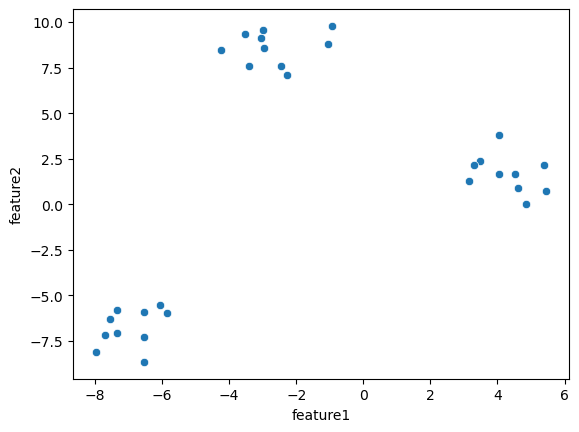

In [8]:
sns.scatterplot(data=blobs, x='feature1', y='feature2');

## K-means clustering

By eye we clearly see that we have three blobs. Now we can use one of the clustering methods to actually let the computer discover those blobs. We look here first at K-means clustering as it is easy to understand. For this method, one uses the following procedure:
1. decide in advance how many clusters are supposed to exist in the dataset, in this case 3. 
2. Randomly place three cluster centers (we do it manually here):

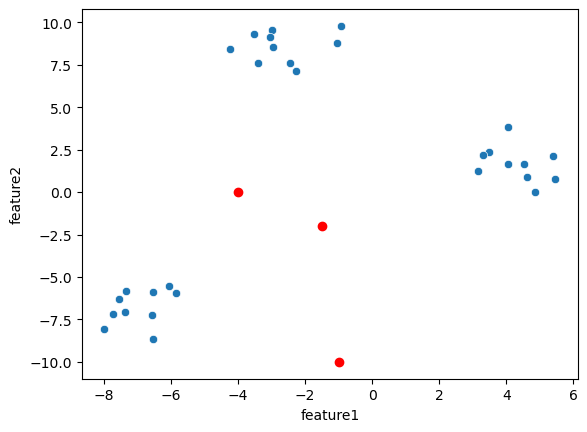

In [9]:
cluster_centers = np.array([[-1, -10], [-4, 0], [-1.5,-2]])

sns.scatterplot(data=blobs, x='feature1', y='feature2')
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'ro');

3. We compute the distance of each of our data points with the three cluster centers and assign the points to the closest one. Below you can see for each point it's distance to the three cluster.

In [10]:
distances = np.stack([np.linalg.norm(blobs[['feature1', 'feature2']].values - cluster_centers[i], axis=1) for i in range(3)], axis=1)
distances

array([[19.6566878 ,  9.61126525, 11.65105851],
       [11.99809256,  7.27020334,  5.68439744],
       [13.13943014,  7.84860382,  6.61827972],
       [14.71482885,  8.90203708,  8.03786007],
       [18.7885603 ,  9.27245967, 10.79816151],
       [19.49237889,  9.34077047, 11.50757449],
       [13.71761979,  9.62041609,  8.0304938 ],
       [ 7.5925231 ,  6.71301412,  6.9802535 ],
       [17.14789455,  7.30936098,  9.13328846],
       [ 5.69986291,  9.0075179 ,  8.33623562],
       [12.91333604,  8.68667435,  7.05516991],
       [ 6.19219153,  7.70154622,  7.29936728],
       [12.72206042,  8.21320543,  6.65104852],
       [11.59646332,  8.84875273,  6.66038369],
       [19.23514494,  9.17415633, 11.23315988],
       [12.91124887,  7.62691849,  6.36722431],
       [ 6.31832042,  6.22944591,  5.87399496],
       [17.64851993,  7.74786941,  9.63566185],
       [17.76718172,  7.62428799,  9.79151702],
       [ 7.5440657 ,  7.20710054,  7.40954189],
       [ 7.2830478 ,  8.09420511,  8.099

and here we compute in which of the thre column we find the minimum distance:

In [11]:
min_dist = np.argmin(distances, axis=1)
min_dist

array([1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0,
       2, 2, 2, 1, 0, 1, 1, 2])

So now we can assign these labels to our data:

In [12]:
blobs['cluster_label'] = min_dist

On the left we have the actual labels and on the right the ones obtained by clustering:

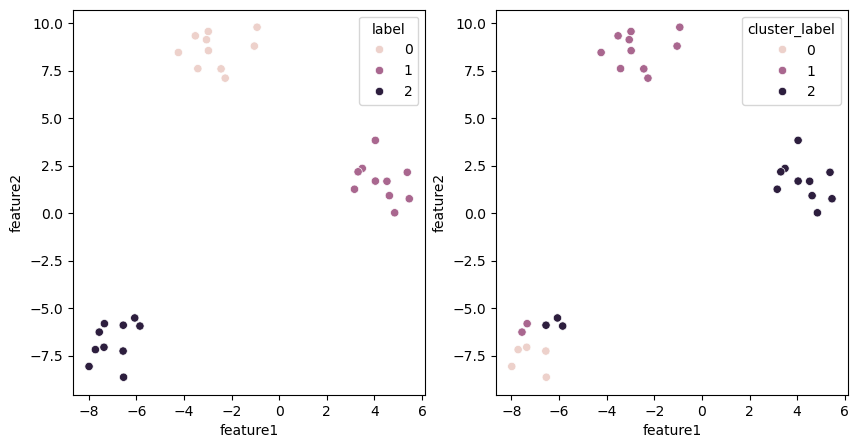

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue='label', ax=ax[0])
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue='cluster_label', ax=ax[1]);

4. We see that in the lower left cluster, some points are mis-assigned. Now we compute the mean position of the clusters and use that now as our ```cluster_centers```:

In [14]:
cluster_centers = np.stack([blobs[blobs.cluster_label == i][['feature1', 'feature2']].mean().values for i in range(3)], axis=0)

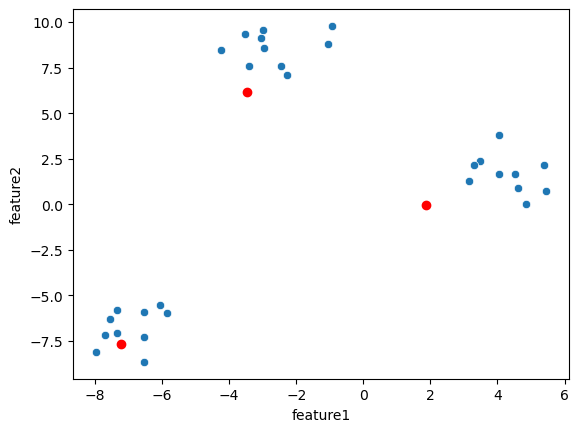

In [15]:
sns.scatterplot(data=blobs, x='feature1', y='feature2')
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'ro');

5. Because of the mis-assigned points, the cluster centers are not really in the middle of the clusters but they moved in the right direction. Now we can repeat the same operation as before: we assign points to the closest cluster center and update the center positions

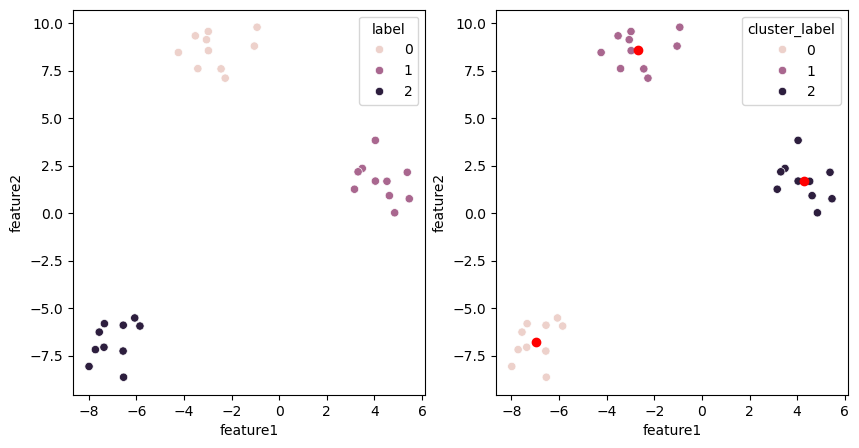

In [16]:
distances = np.stack([np.linalg.norm(blobs[['feature1', 'feature2']].values - cluster_centers[i], axis=1) for i in range(3)], axis=1)
min_dist = np.argmin(distances, axis=1)
blobs['cluster_label'] = min_dist
cluster_centers = np.stack([blobs[blobs.cluster_label == i][['feature1', 'feature2']].mean().values for i in range(3)], axis=0)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue='label', ax=ax[0])
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue='cluster_label', ax=ax[1])
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'ro');

Now already at the second iteration, we have detected the clusters. Usually of course multiple rounds are needed as generally data are not as clean as these blobs used above. You can already see here potential problems with the method: for example if your initial random positions are far from one cluster, it can be ignored and we end up with only two labels. Each method has such limitations.

## Application in scikit-learn

Above we did all the steps manually, but of course the algorithm is implemented in scikit-learn so that you can use it out of the box. Again here, the way to use the method is similar to what we have seen before. First we import the method:

In [146]:
from sklearn.cluster import KMeans

Then we instantiate our model with the required parameters. Here we specify the number of cluster that we expect:

In [147]:
kmeans_model = KMeans(n_clusters=3)

Then we fit our model. Note that in this case, as we don't have a target, we only need the features variable ```X```:

In [148]:
X = blobs[['feature1', 'feature2']]

In [149]:
kmeans_model.fit(X)

/Users/gw18g940/mambaforge/envs/DAVPy2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

From our model we can already recover the labels that have been detected:

In [150]:
kmeans_model.cluster_centers_

array([[-2.6860672 ,  8.58739003],
       [-6.95160684, -6.77084326],
       [ 4.2879471 ,  1.67770362]])

In [151]:
kmeans_model.labels_

array([0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 2, 0, 1, 0, 0, 1], dtype=int32)

Let's see if they correspond to our expectations:

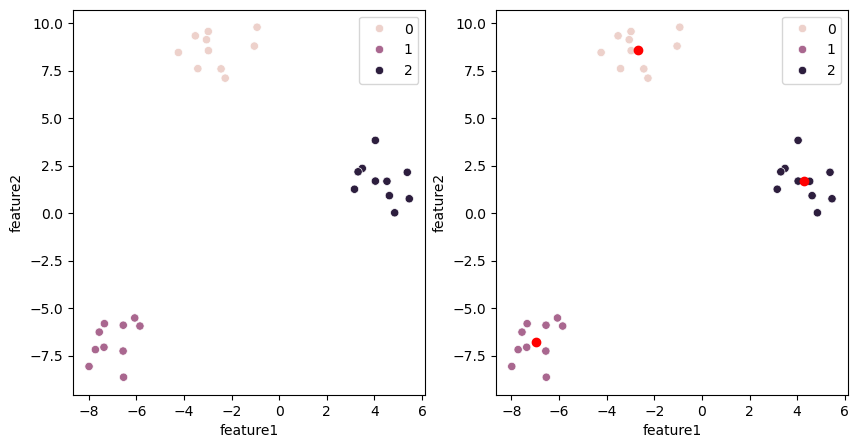

In [152]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue=kmeans_model.labels_, ax=ax[0])
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue=kmeans_model.labels_, ax=ax[1])
plt.plot(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], 'ro')

### Comparing with real labels

In real life, we use clustering because we don't actually have labels for our data. When we test a method as we do above, we have labels and can check e.g. that the algorithm does what we expect. Note however that it can be tricky now to estimate the quality of the result, as the order in which labels are assigned to clusters doesn't necessarily correspond to our "real" labels: e.g. the cluster #1 might be labeled #2. One could check the "real" labels surrounding our predicted cluster centers and take a majority vote. In the example above this would work, however if the clustering is not so clear cut (outliers, touching clusters etc.) this might be tricky to do.

## Real case

Let's look now at a real dataset. The following table contains information about the size and growth rate of bacteria growing in two different conditions:

In [153]:
bacteria = pd.read_csv('../data/coli.csv')

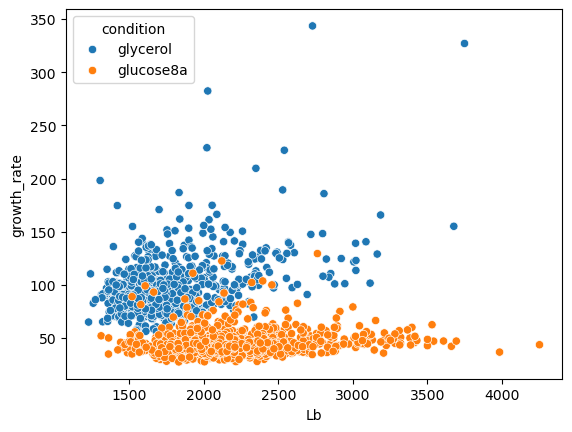

In [156]:
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue='condition');

Again, we happen to know here the two conditions. But you might imagine an experiment where you have different populations of cells measured at the same time and wish to identify different groups. Let's initialize a clustering model: 

We know that we have three seed types so we can run the Kmeans model using 3 clusters:

In [157]:
X = bacteria[['Lb', 'growth_rate']]

kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X=X)

/Users/gw18g940/mambaforge/envs/DAVPy2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

Let's check the prediction and compare it to the actual categories:

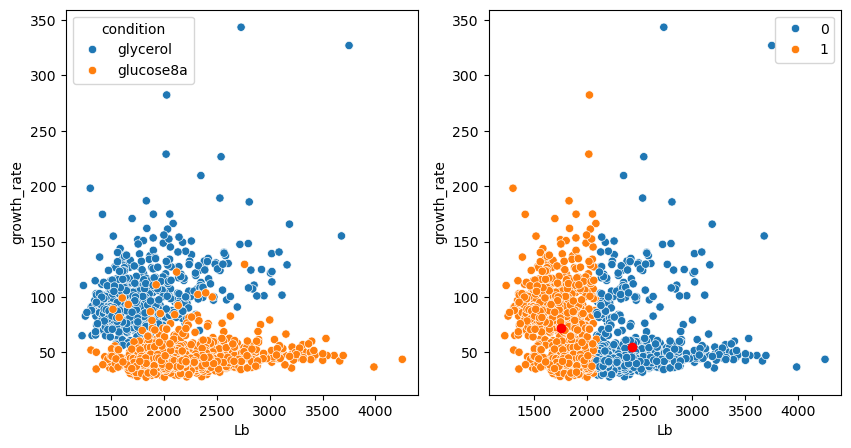

In [158]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue='condition', ax=ax[0])
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue=kmeans_model.labels_, ax=ax[1])
plt.plot(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], 'ro');

Two groups were found but they don't correspond to what we expect, also not by visual exploration. We have seen this issue previously: the two features have very different dimensions.

## Feature scaling

In the case of K-means clustering the reason is particularly evident: as we measure distances between points, if one feature has a much larger scale, then it will dominate the clustering, i.e. the data will mainly be partitioned along one given axis as is the case here with the length ```Lb```. We can now check whether scaling our feature in the above case, could help obtain a better clustering. Again we use the ```preprocessing``` module:

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

In [161]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X=X_scaled)

/Users/gw18g940/mambaforge/envs/DAVPy2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

Note that when we want to plot things in the original space, we need to "reverse" the scaling. For example of the cluster centers:

In [162]:
std_scaler.inverse_transform(kmeans_model.cluster_centers_)

array([[1744.11062164,   95.15701061],
       [2209.21844017,   44.08175174]])

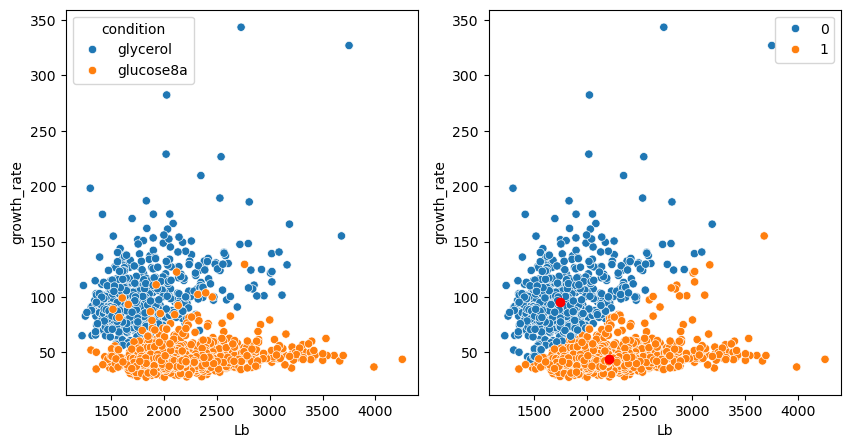

In [163]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue='condition', ax=ax[0])
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue=kmeans_model.labels_, ax=ax[1])
plt.plot(std_scaler.inverse_transform(kmeans_model.cluster_centers_)[:,0], std_scaler.inverse_transform(kmeans_model.cluster_centers_)[:,1], 'ro');

We see that the scaling completely fixes the problem! Certain points are still miss-classified but that will always be the case.

## Other methods

As mentioned above, there are many ways to detect clusters in a dataset. Just for the purpose of illustration, we show here two alternatives called Mean Shift and DBScan clustering which are capable of finding clusters in smooth distributions and can determine the number of clusters on their own, i.e. we don't have to provide a ```n_clusters``` argument.

In [198]:
from sklearn.cluster import MeanShift, DBSCAN

In [199]:
ms_model = MeanShift()
ms_model.fit(X=X_scaled)

MeanShift()

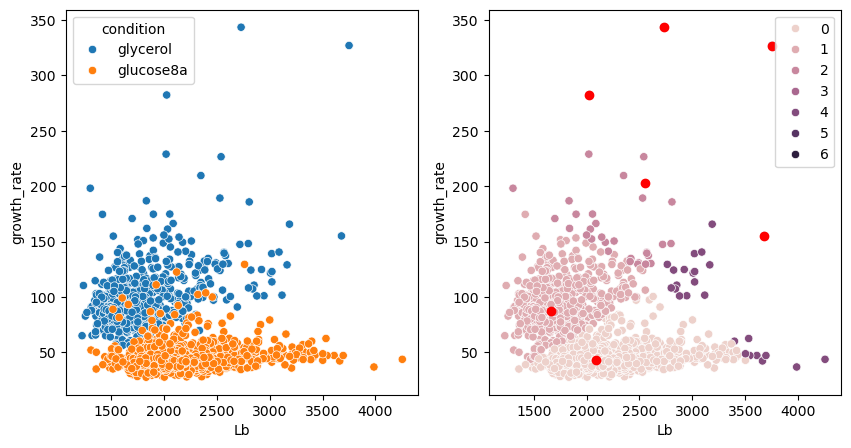

In [201]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue='condition', ax=ax[0])
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue=ms_model.labels_, ax=ax[1])
plt.plot(std_scaler.inverse_transform(ms_model.cluster_centers_)[:,0], std_scaler.inverse_transform(ms_model.cluster_centers_)[:,1], 'ro');

We see that the algorithm gives a good results, but generates additional clusters for isolated points. Those can be removed in a post-processing step.

We try now DBSCAN, which is a method that finds high density regions and expands from those to all points. This method has one importante option ```eps``` which sets the maximum distance of points within a group. You can test various values for this parameter.

In [221]:
db_model = DBSCAN(eps=0.1)
db_model.fit(X=X_scaled)

DBSCAN(eps=0.1)

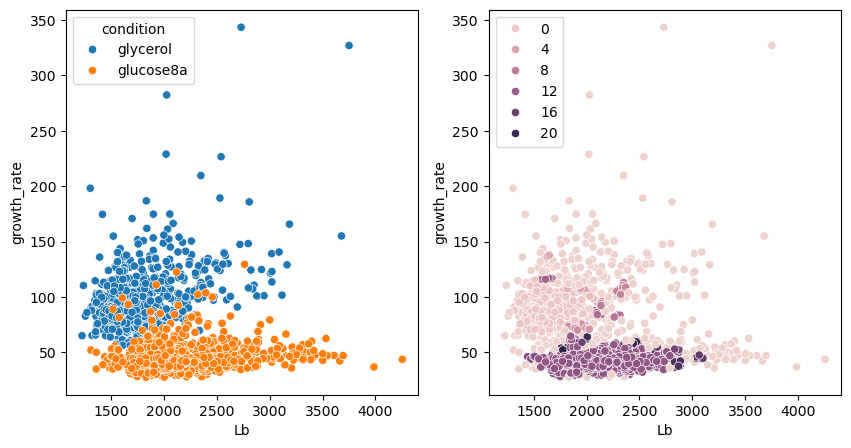

In [222]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue='condition', ax=ax[0])
sns.scatterplot(data=bacteria, x='Lb', y='growth_rate', hue=db_model.labels_, ax=ax[1]);

We see that the method is also capable of finding relevant clusters but with a fairly different results from previous solutions. It is difficult to tell in advance which clustering methods is optimal for a problem, and often some trial and error is necessary.

## Exercise



1. Import the movement.csv dataset
2. Visualize as scatter plot of ```z_acc``` and ```y_acc``` and color by the ```move_type```.
2. Try to cluster the data with these features. Try KMeans and DBSCAN. Do you achieve a good clustering?